In [ ]:
# Since we already did basic data checks (missing values, duplicates, unique values, etc.), 
# in 02_eda.ipynb we focus on Exploratory Data Analysis (EDA). The goal is to deeply 
# understand dataset before moving into feature engineering and modeling.

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Loading Training Data
train_df = pd.read_csv("../data/raw/train.csv")
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,21740,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,0
1,22648,32,technician,single,secondary,no,116,yes,no,cellular,20,aug,718,2,-1,0,unknown,1
2,31793,56,housemaid,married,primary,no,82,no,no,unknown,16,may,215,1,-1,0,unknown,0
3,21439,25,services,single,secondary,no,333,no,yes,cellular,15,jul,1056,2,-1,0,unknown,1
4,70323,38,services,married,secondary,no,393,no,no,unknown,18,jun,90,3,-1,0,unknown,0


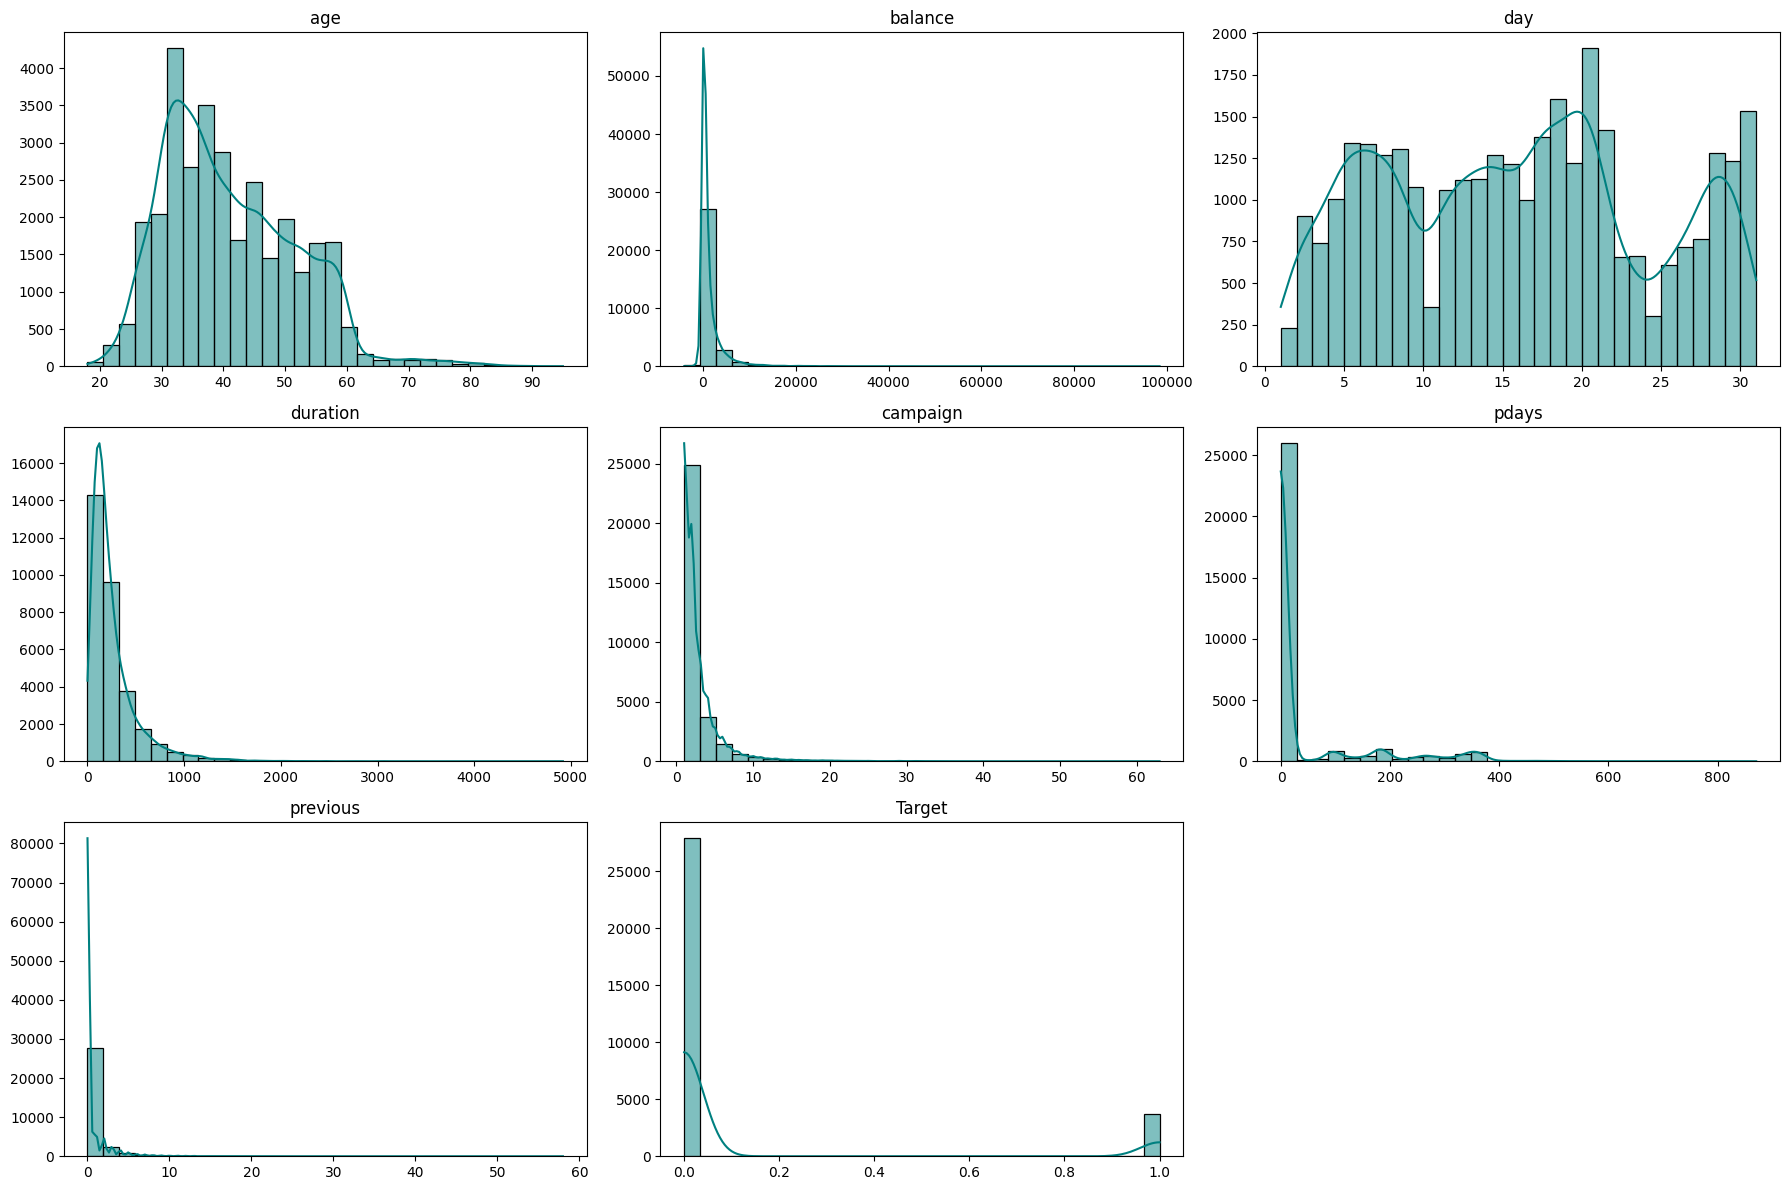

In [4]:
# Univariate Analysis

# A. Numerical Features
int_cols = [col for col in train_df.select_dtypes(include='int64').columns if 'id' not in col.lower()]

rows = (len(int_cols) + 2) // 3   
fig, axes = plt.subplots(rows, 3, figsize=(18, rows*4))
axes = axes.flatten()
for i, col in enumerate(int_cols):
    sns.histplot(train_df[col], kde=True, bins=30, ax=axes[i], color="teal")
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Key Takeaways from Numerical Features
"""   
1. Most clients are between 30-40 years
2. Majority have balance close to 0, but a few have very large balances (outliers).
3. Calls are spread across the month.
4. most calls are short (<500 sec).
5. Most clients are contacted 1-3 times.
6. Majority have 0 or very few previous contacts.
"""

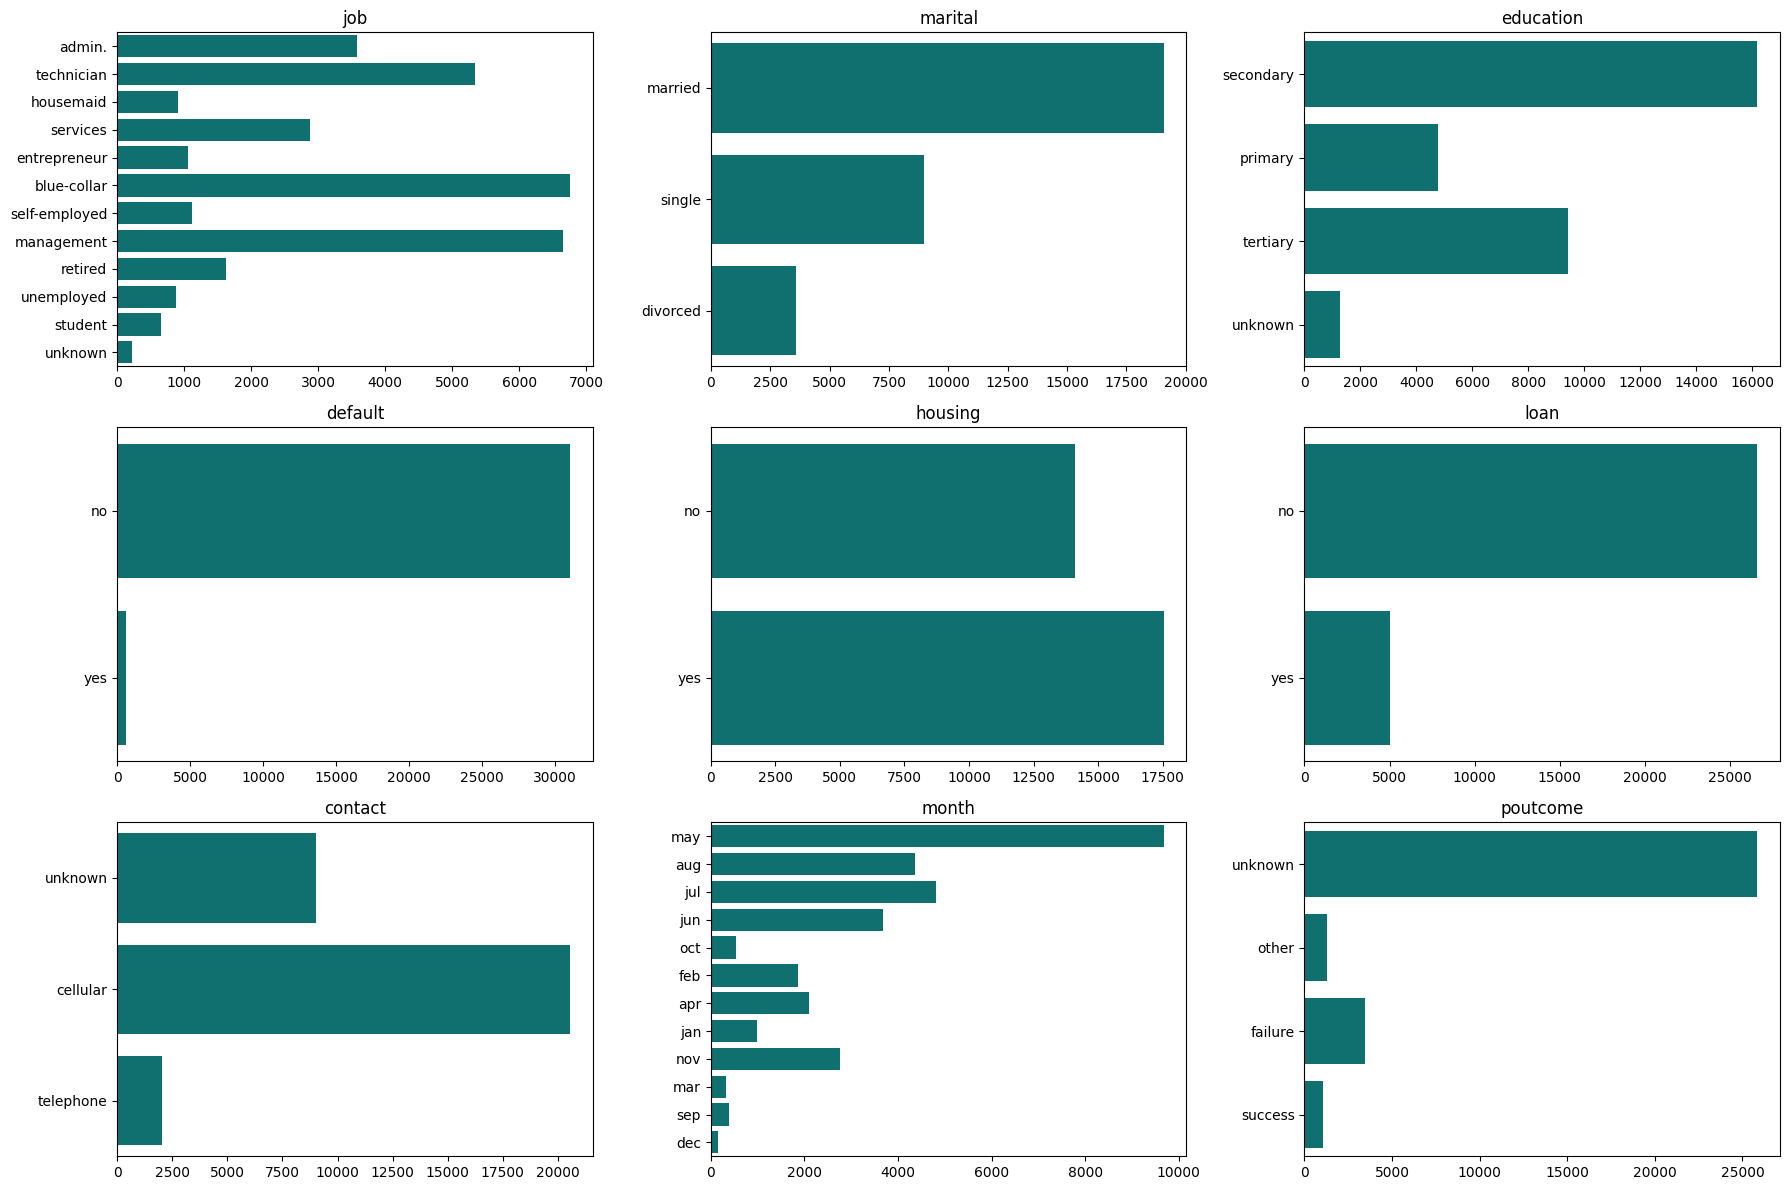

In [6]:
# B. Categorical Features
object_cols = train_df.select_dtypes(include='object').columns
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(object_cols):
    sns.countplot(train_df[col], ax=axes[i], color="teal")
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# Key Takeaways from Categorical Features
"""   
1. Most common jobs: blue-collar, management, technician
2. Rare: student, unemployed, unknown.
3. Majority are married, followed by single
4. Most have secondary education, then tertiary.
5. Vast majority are not in default.
6. Housing Loan: Roughly 50- 50 split between “yes” and “no”.
7. Most clients do not have a personal loan.
8. Majority via cellular, Very few via telephone.
9. Most campaigns occur in May, July, August, June.
10. Poutcome (previous outcome)
    Most values are unknown
    Among known, majority are failure
"""

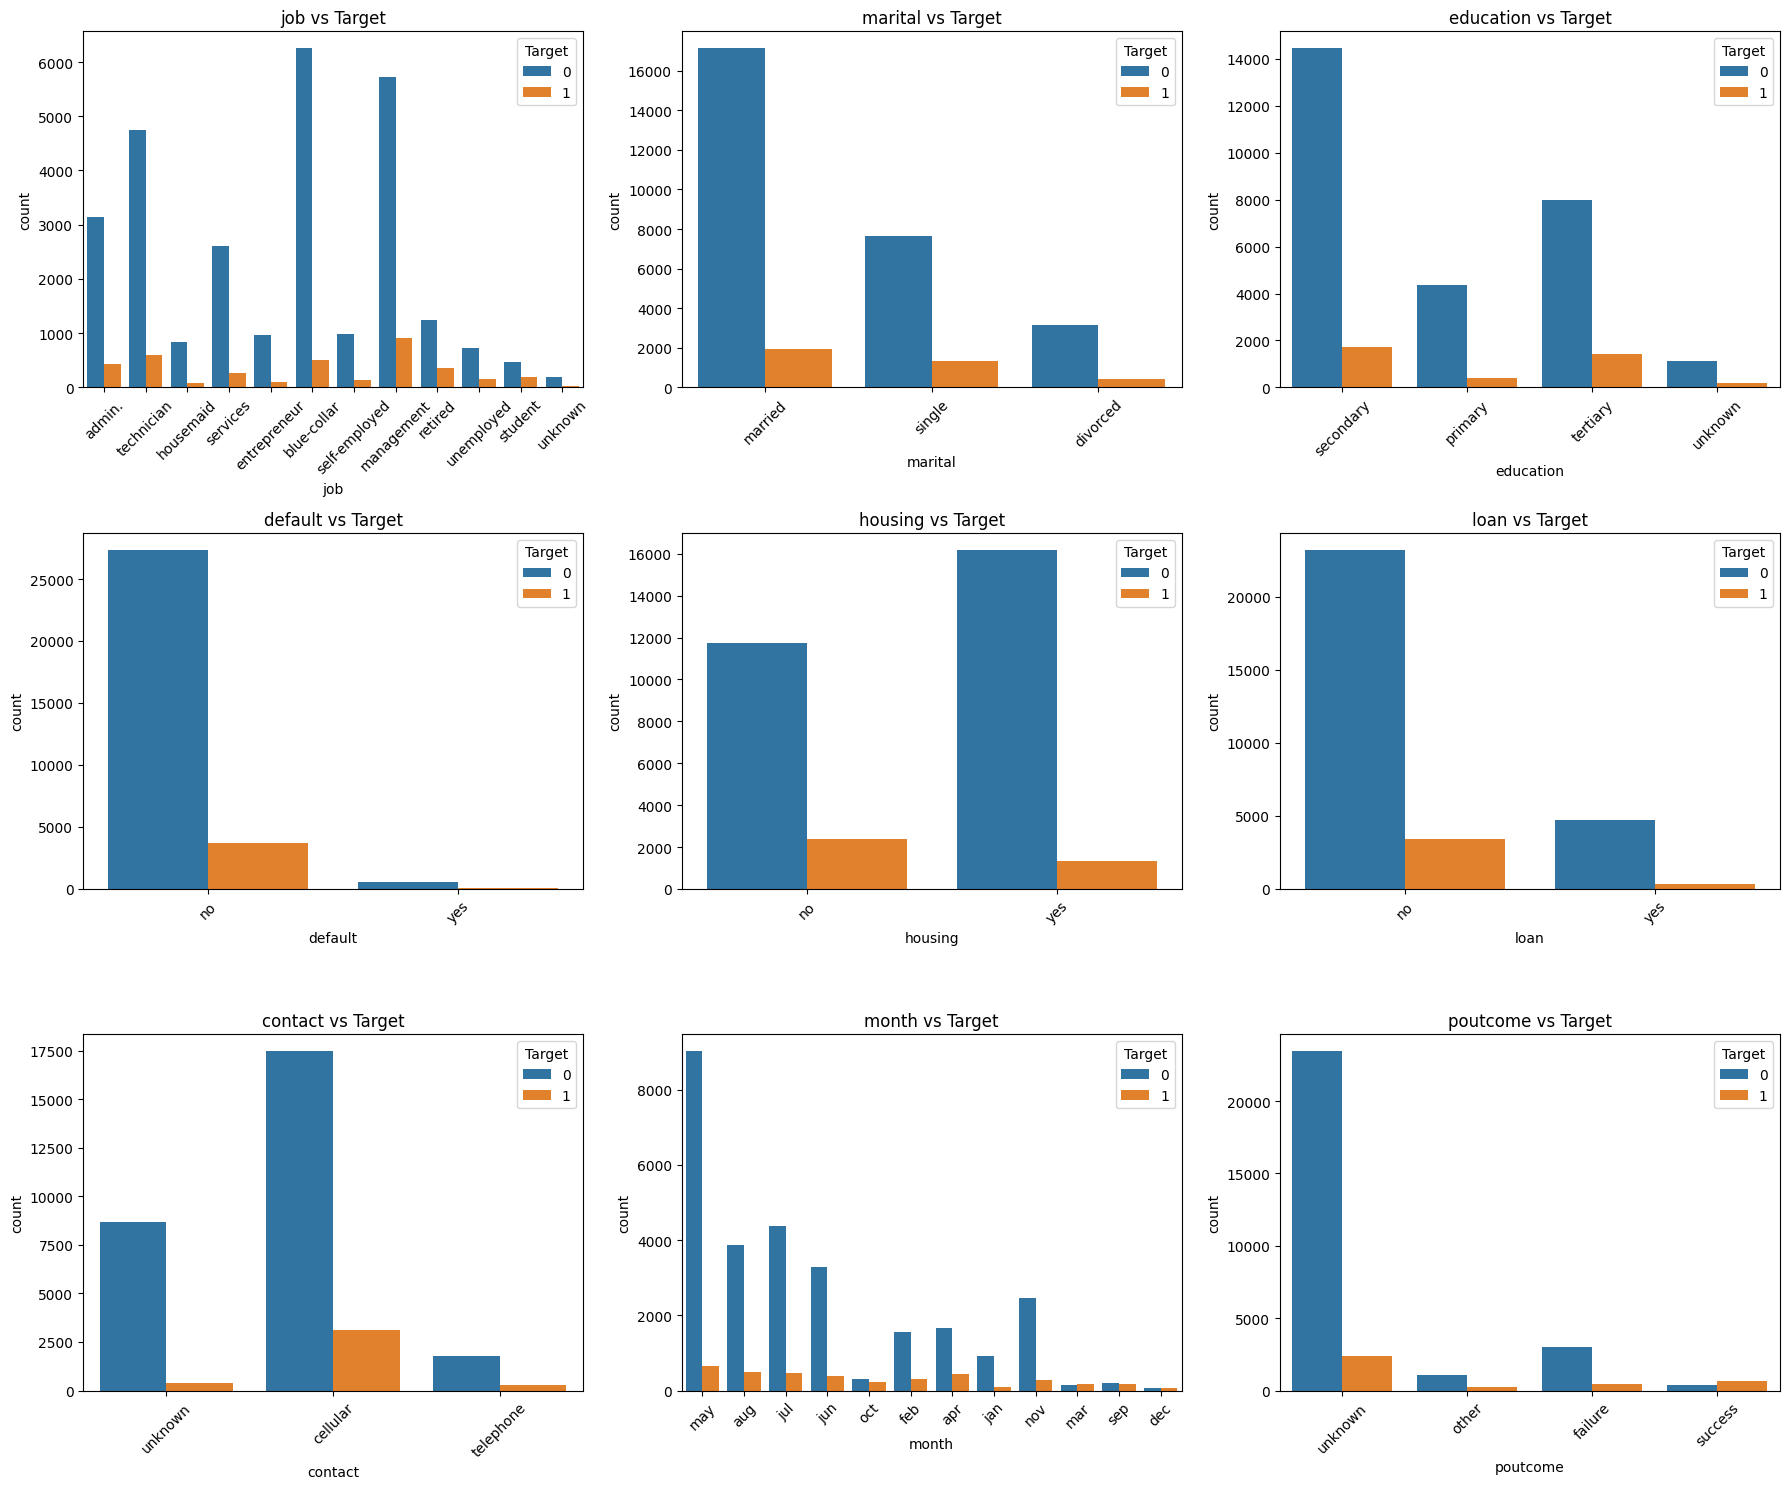

In [20]:
# Bivariate Analysis 

# A. Categorical Features
object_cols = train_df.select_dtypes(include='object').columns
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(object_cols):
    sns.countplot(x=col, ax=axes[i], hue='Target', data=train_df)
    axes[i].set_title(f"{col} vs Target", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Key Takeaways : Categorical Features vs Target
""""  
1. Higher subscription rates among students, management, blue-collar.
2. Single and married clients tend to subscribe more often than divorced ones.
3. Tertiary education group has the highest subscription rate.
4. Very few clients in default.
5. Clients without housing loans are more likely to subscribe.
6. Clients without personal loans show higher subscription rates.
7. Cellular contact performs significantly better than telephone/unknown.
8. May has the largest number of calls.
9. If the previous outcome was “success”, the current campaign also has much higher success.
"""

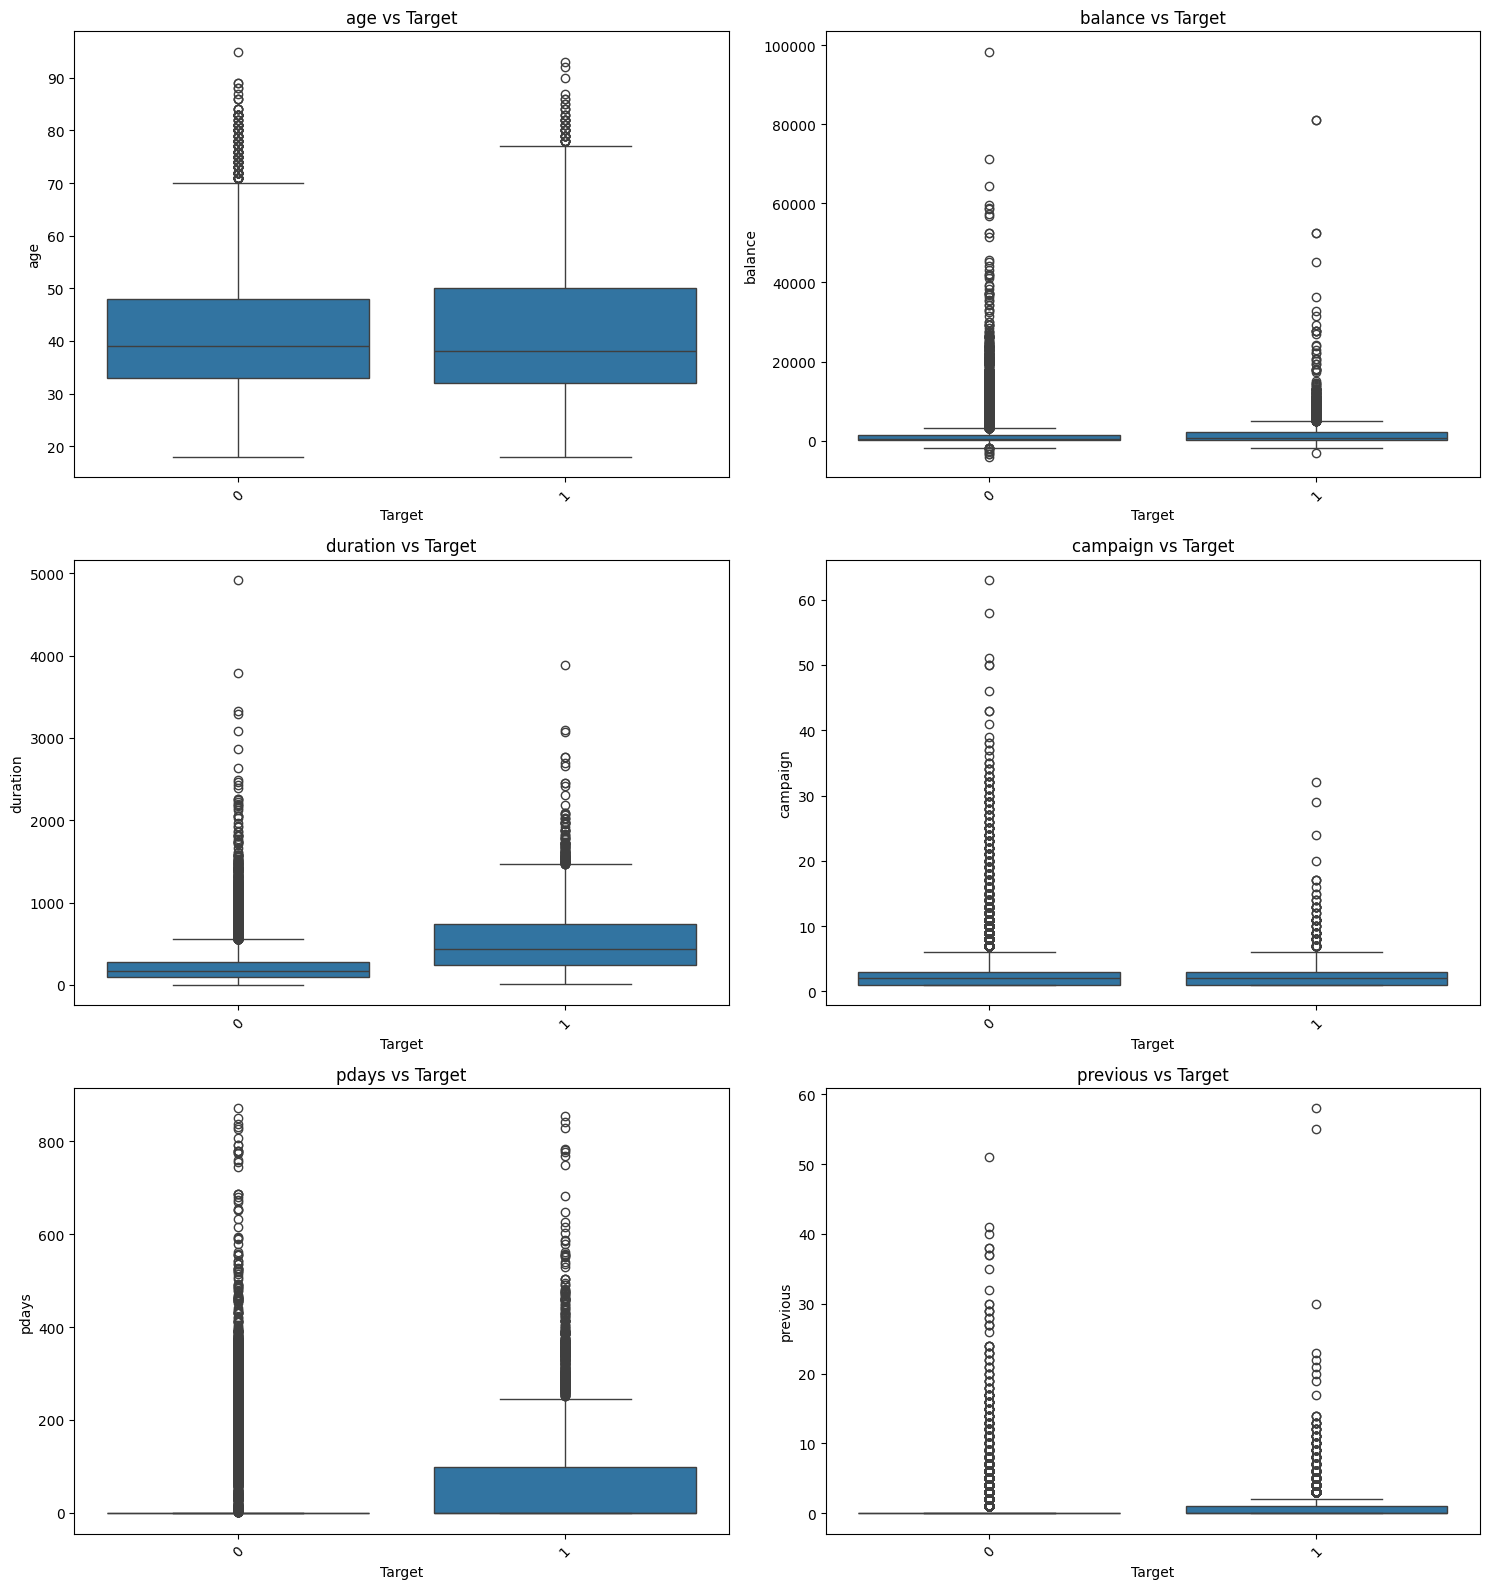

In [24]:
# B. Numerical Features
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(3, 2, figsize=(15, 16))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x='Target', y=col, ax=axes[i], data=train_df)
    axes[i].set_title(f"{col} vs Target", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Key Takeaways : Numerical Features vs Target
"""   
1. Clients with higher average yearly balance are more likely to subscribe.
2. Strongest driver: Longer calls -> much higher chance of “yes”.
3.  Success rate higher with fewer contacts (1-3).
4. Too many contacts generally correlate with “no”.
5. Clients recently contacted (small pdays > -1) show higher success.
6. Clients with previous successful interactions are more likely to subscribe.
"""

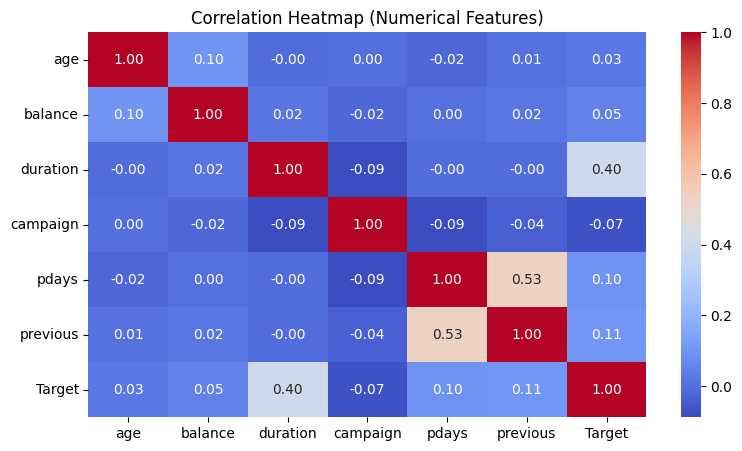

In [26]:
# Correlation Heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(train_df[num_cols + ['Target']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [32]:
# Extracting more deep insights

In [33]:
#1. Target-based group analysis
job_target_rate =  (
        train_df.groupby("job")["Target"]
        .mean().sort_values(ascending=False).mul(100).round(2)
)
job_target_rate

job
student          28.81
retired          22.57
unemployed       17.31
management       13.79
admin.           12.18
unknown          12.00
self-employed    11.80
technician       11.16
services          9.17
entrepreneur      8.60
housemaid         8.19
blue-collar       7.50
Name: Target, dtype: float64

In [ ]:
# Insights:
"""   
1. Students (28.8%) -> Highest likelihood of subscribing.
2. Retired (22.5%) -> Second highest, also very strong group.
3. Unemployed (17.3%) -> Surprisingly higher than average.
Takeaway: Campaigns work much better with students, retirees, unemployed, and management. 
Resources should be allocated more towards these groups.
"""

In [38]:
marital_target_rate =  ( 
        train_df.groupby("marital")["Target"]
        .mean().sort_values(ascending=False).mul(100).round(2)
)
marital_target_rate

marital
single      15.11
divorced    12.35
married     10.20
Name: Target, dtype: float64

In [ ]:
# Insights from Marital Status:
""" 
1. Single (15.1%) -> Highest among marital groups.
2. Divorced (12.3%) -> Moderate.
3. Married (10.2%) -> Lowest.
Takeaway: Singles are more open to subscribing than married clients.
"""

In [40]:
education_target_rate = ( 
        train_df.groupby("education")["Target"]
        .mean().sort_values(ascending=False).mul(100).round(2)
)
education_target_rate

education
tertiary     15.13
unknown      14.04
secondary    10.69
primary       8.67
Name: Target, dtype: float64

In [ ]:
# Insights from Education:
"""   
1. Tertiary (15.1%) → Highest likelihood, matches with better financial awareness.
Takeaway: Higher education strongly correlates with higher subscription.
"""

In [42]:
# 2. Financial behavior:

# Checking for Balance vs Target
train_df.groupby("Target")["balance"].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,27900.0,1309.514086,3014.424564,-4057.0,57.0,421.0,1336.25,98417.0
1,3747.0,1793.088871,3688.389780,-3058.0,210.5,718.0,2093.50,81204.0


In [ ]:
# Clients with higher account balances are more likely to subscribe to a term deposit.

In [43]:
# Loan/ Housing Loan  effects
pd.crosstab(train_df["loan"], train_df["Target"], normalize="index")

Target,0,1
loan,,
no,0.872241,0.127759
yes,0.930891,0.069109


In [ ]:
"""   
1. Subscription rate is almost double for clients without loans (12.8%) 
   compared to those with loans (6.9%).

2. Clients with loans are mostly in the "No" group (93%).

3. Loan-free clients are more attractive targets for marketing campaigns, 
   since they have higher chances of subscribing.

Overall Insight:
Clients without loans are ~2x more likely to subscribe to a term deposit than those with loans.
"""

In [44]:
pd.crosstab(train_df["housing"], train_df["Target"], normalize="index")

Target,0,1
housing,,
no,0.830498,0.169502
yes,0.922695,0.077305


In [ ]:
"""  
1. Clients without housing loans are more than 2x likely to subscribe (16.9%) 
compared to those with housing loans (7.7%).

2. Having a housing loan reduces the likelihood of subscription ->  probably because these 
clients already have a significant financial burden.

Clients without a housing loan are ~2.2x more likely to subscribe to a term deposit 
than those with a housing loan.
"""

In [45]:
# 3. Call effectiveness:
train_df.groupby("Target")["duration"].mean()

Target
0    222.213728
1    541.942087
Name: duration, dtype: float64

In [ ]:
# Insight:
"""" 
1. Subscribers talk much longer - average call duration is more than 2.4x higher for 
those who subscribed (542s vs 222s).

Longer calls are strongly associated with successful subscriptions, 
but duration should be excluded from predictive modeling since it leaks future information.

But it is very useful for benchmarking and understanding campaign behavior.
"""

In [51]:
# 4. Month vs Target (Subscription Rate %)
train_df.groupby("month")["Target"].mean().sort_values(ascending=False).mul(100).round(2)

month
mar    51.08
dec    48.37
sep    46.43
oct    42.45
apr    20.58
feb    16.50
aug    11.13
nov    10.45
jun    10.39
jul     9.39
jan     9.05
may     6.86
Name: Target, dtype: float64

In [ ]:
# Key Takeaways:
"""" 
1. March, December, September, October -> extremely high subscription rates (40-50%).
These months are prime opportunities for campaigns.

2. May (6.9%), January (9.0%), July (9.4%) -> lowest success rates.
Especially May, which often has the largest call volume but the lowest success.

Overall Insight:
Campaign effectiveness is highly seasonal. 
Running campaigns in Mar, Dec, Sep, Oct yields far better conversion rates than other months.
May has high activity but very poor success → inefficient use of resources.
"""

In [54]:
# Success rate per month (%)
success_rate = (
    train_df.groupby("month")["Target"]
    .mean()
    .mul(100)
    .round(2)
)

# Number of calls
calls = train_df.groupby("month")["Target"].count()

month_summary = (
    pd.DataFrame({"Calls": calls, "SuccessRate(%)": success_rate})
    .sort_values(by="Calls", ascending=False)
)

print(month_summary)


       Calls  SuccessRate(%)
month                       
may     9680            6.86
jul     4823            9.39
aug     4359           11.13
jun     3676           10.39
nov     2755           10.45
apr     2089           20.58
feb     1873           16.50
jan      994            9.05
oct      530           42.45
sep      392           46.43
mar      323           51.08
dec      153           48.37


In [ ]:
"""
1. High Volume, Low Success:
May, July, August, June -> Thousands of calls but very poor subscription rates (<12%).

2. Low Volume, High Success:
March, September, October, December -> Very few calls but 40-50% success rates.
"""

In [57]:
# Effect of previous outcomes (poutcome)
train_df.groupby("poutcome")["Target"].mean().sort_values(ascending=False)

poutcome
success    0.658723
other      0.161994
failure    0.124675
unknown    0.093466
Name: Target, dtype: float64

In [ ]:
# People with prior success have much higher subscription rates.